In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random

In [2]:
segment_directory = "data/segmentation.csv"

segment = pd.read_csv(segment_directory, header=0 )


In [3]:
segment.head()

,CustomerId,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
0,8b4f8c66-7589-4734-8ada-2d42f60540ab,100.40,2019-06-04,6,0.35,0.08,0.609740,0.949383
1,2151b2a2-8867-4986-9e00-449c2b4f89e9,170.00,2019-05-25,4,0.66,0.16,0.942272,0.479846
2,3111db79-6721-4ec0-82b1-30b810649c5e,70.75,2019-05-25,6,0.92,0.20,0.323030,0.007076
3,9cb76426-cc5d-4fa3-88bc-b92314b9f4e8,75.00,2019-03-20,10,0.35,0.78,0.876833,0.088974
4,5d86caeb-2d53-44a7-b379-7f15f06ca821,94.51,2019-04-10,5,0.51,0.44,0.912099,0.206194


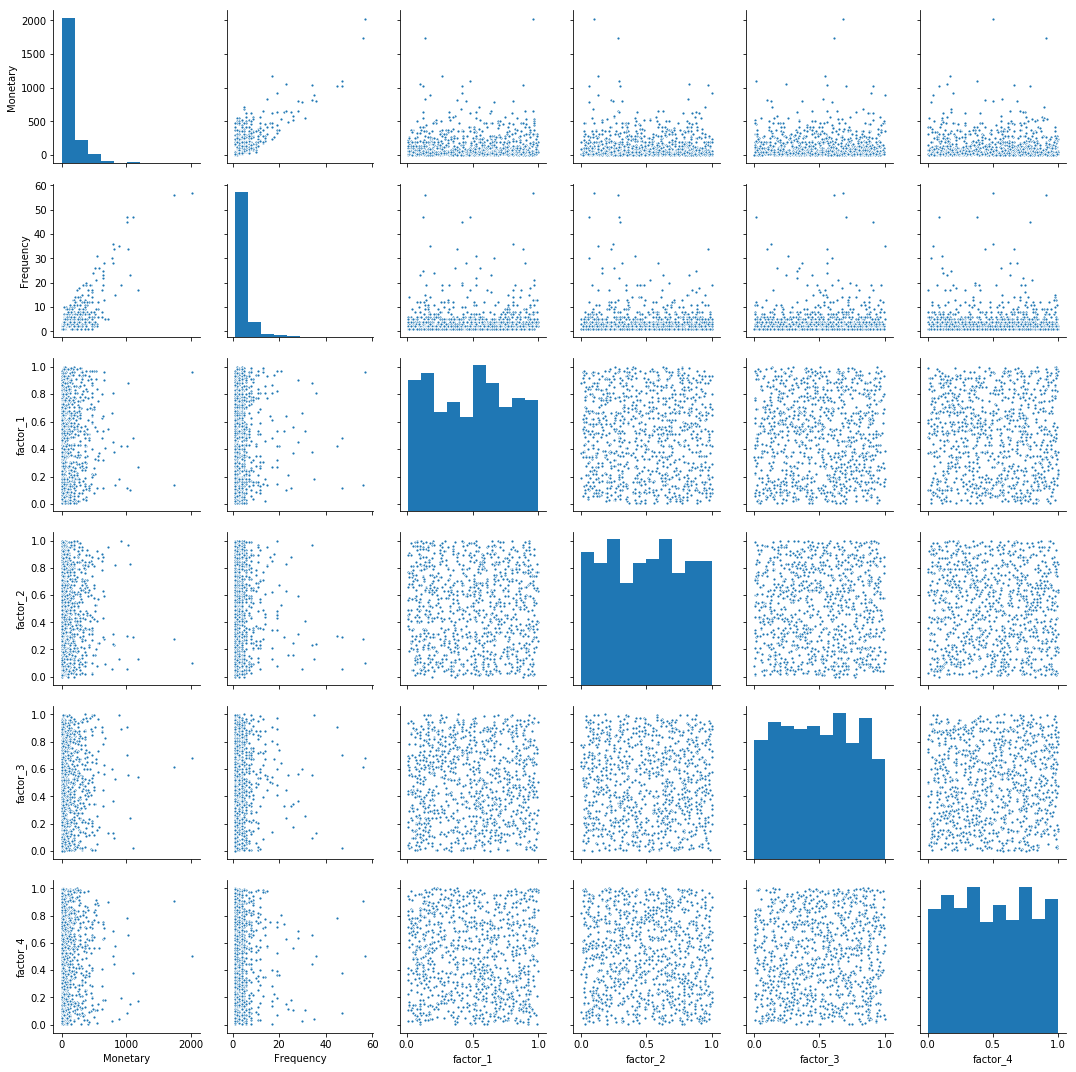

In [4]:
sns.pairplot(segment[:1000], markers='.')

In [5]:
from sklearn.cluster import KMeans
m_f = np.array([segment[:10000]["Monetary"], 
                segment[:10000]["Frequency"]])
kmeans = KMeans(n_clusters=3, random_state=90).fit(segment.loc[:,['Monetary', 'Frequency']])
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 1])

In [6]:
clusters = segment.assign(cluster=kmeans.labels_)

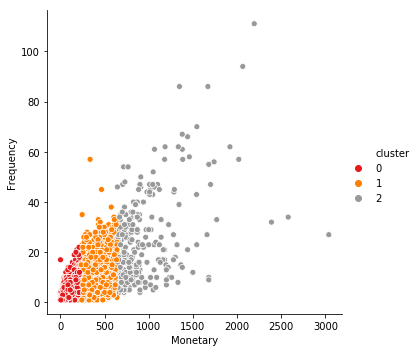

In [7]:
sns.relplot(x='Monetary', y='Frequency', palette='Set1',data=clusters[:], hue='cluster')

           Monetary  Frequency  factor_1  factor_2     factor_3     factor_4
cluster                                                                     
0         791830.29      34655   6509.54   6457.08  6428.179843  6472.778775
1        1002471.43      21577   1332.01   1359.48  1346.714012  1339.040483
2         285254.50       6979    158.58    149.26   152.317313   163.011294
#####################
 Monetary
           count        mean         std     min       25%     50%       75%  \
cluster                                                                        
0        12982.0   60.994476   55.959128    0.00   17.4925   42.19    93.555   
1         2705.0  370.599420  110.722888  217.01  275.0000  351.37   460.000   
2          313.0  911.356230  329.987880  645.00  715.0000  790.00  1010.000   

             max  
cluster           
0         215.79  
1         640.00  
2        3040.00  
#####################
 Frequency
           count       mean        std  min  25%   50%

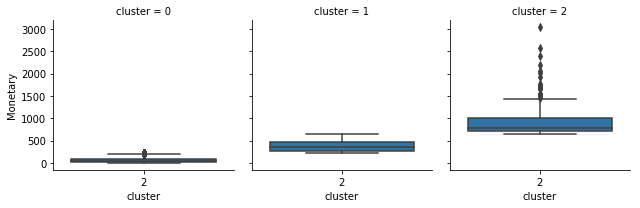

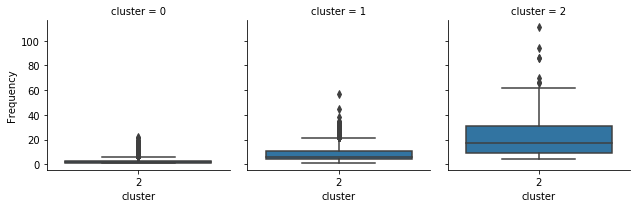

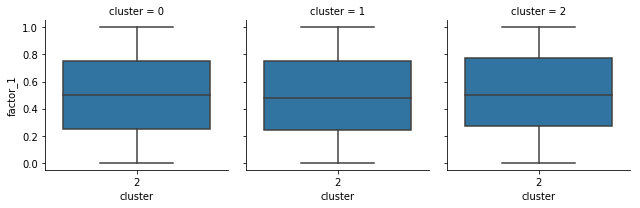

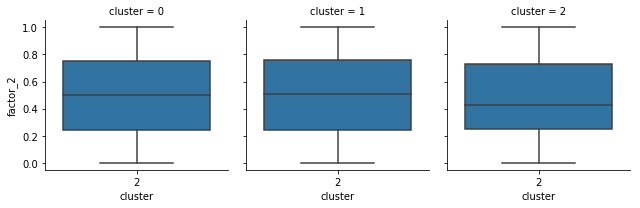

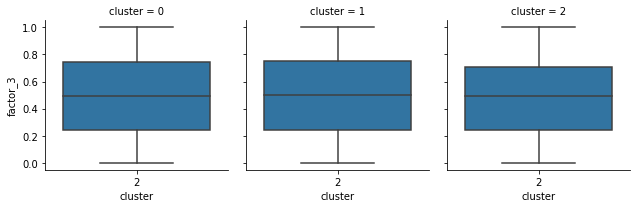

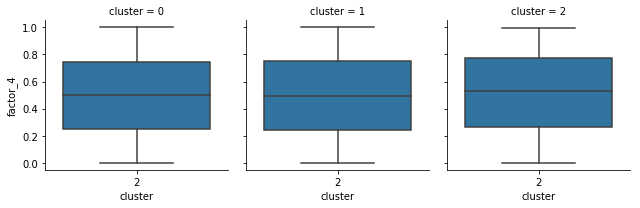

In [19]:
grouped = clusters.groupby('cluster')
grouped_disc = grouped.describe()
print(clusters.groupby('cluster').agg('sum'))
factors = grouped_disc.columns.levels[0].to_list()

#


for factor in factors:
    
    g = sns.FacetGrid(clusters, col='cluster')
    g.map(sns.boxplot , 'cluster', factor)
    print('#####################\n',factor)
    print(grouped_disc[factor])

### Из диаграммы распределения по кластерам и статистической информации по кластерам видно, что 4 кластера имеют следующие характеристики:
1) Кластер 0:

Размер денежных затрат находится в пределах [0..215], а 75% клиентов произвели платеж не более 3 раз (ср. = 2..3) за рассматриваемый период. 
Количество платежей составляет 80% от общего, но несмотря на это, стандартные откланения по осям довольно низки, из-за чего занимаемая кластером область мала. Единичные доходы небольшие, происходят не часто, однако доля клиентов является превалирующей. Кластер среднестатистического пользователя. Общий доход принесенный клиентами этого кластера ~ 791 000 у.е.

2) Кластер 1:

Размер денежных затрат находится в пределах [217..640], а 75% клиентов произвели платеж не более 11 раз (ср. = 6) за рассматриваемый период. 
Количество платежей составляет 17% от общего, однако из за увеличения частоты и оъема платежей общий доход принесенный клиентами этого кластера ~ 1 000 000 у. е., пользователи этого кластера приносят наибольшую прибыль.

3) Кластер 2:

Размер денежных затрат превышает 645, а 75% клиентов произвели платеж 31 раз за рассматриваемый период. 
Количество платежей составляет 2% от общего.
Стандартное отклонение большое, занимаемая графиком площадь большая. Плотность рядом с кластером 1 выше.

#### По поводу факторов:

Исходя из статистических значений и диаграм, различий между значениями в разных кластерах нет. Факторы не несут полезной информации.